## Лаб.04 Agglomer

### Агломеративная кластеризация

---

#### Входные данные: 
`seeds-less-rows` датасет в формате csv, содержащий характеристики сортов зерна.

#### Задание:
Написать программный код построения иерархической структуры кластеров с выводом дендрограммы.

**Порядок выполнения работы:**
1.	Загрузите данные в датафрейм. Создайте копию с удалением столбца меток `grain_variety` (сорт) и сохраните как массив.
2.	При помощи функции `scipy.cluster.hierarchy.linkage` создайте матрицу связей, кодирующую иерархию кластеров.
3.	Постройте дендрограмму при помощи функции `dendrogram` в полном виде и «со стрижкой» до третьего уровня кластеризации.
4.	Обучите модель кластеризации `AgglomerativeClustering` с построением кластеров без каких-либо ограничений.
5.	Убедитесь в идентичности структуры, построив дендрограмму полученных кластеров. Код для построения:

`def plot_dendrogram(model, **kwargs):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    _# create linkage matrix and then plot the dendrogram_<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    _# create the counts of samples under each node_<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    `counts = np.zeros(model.children_.shape[0])`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    `n_samples = len(model.labels_)`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    `for i, merge in enumerate(model.children_):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        `current_count = 0`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        `for child_idx in merge:`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            `if child_idx < n_samples:`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                `current_count += 1`  _# leaf node_<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            `else:`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                `current_count += counts[child_idx - n_samples]`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        `counts[i] = current_count`<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    `linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)`<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    _# plot the corresponding dendrogram_<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    `dendrogram(linkage_matrix, **kwargs)`

---

1.	Загрузите данные в датафрейм. Создайте копию с удалением столбца меток `grain_variety` (сорт) и сохраните как массив.

In [ ]:
# подключим необходимые библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import cycle
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# добавим данные в датаафрейм

# use this line if on Jupyter
# df = pd.read_csv('seeds-less-rows.csv')

# use this line if on Colab
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/seeds-less-rows.csv')

In [ ]:
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


In [ ]:
# записываем колонку grain_variety в отдельный массив

y = df['grain_variety']

In [ ]:
# Make a copy with the label column grain_variety(variety) removed and save as an array.

df2 = df.drop('grain_variety', axis=1)
df2 = df2.values
print(type(df2))

<class 'numpy.ndarray'>


In [ ]:
# удаляем колонку grain_variety и проверим как выглядит таблица без неё

df2 = df.drop('grain_variety',axis=1)
df2 = df2.values
print(type(df2))

<class 'numpy.ndarray'>


---

2.	При помощи функции `scipy.cluster.hierarchy.linkage` создайте матрицу связей, кодирующую иерархию кластеров.

In [ ]:
# using the scipy.cluster.hierarchy.linkage function, create a link matrix encoding the cluster hierarchy

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(df2, method='complete')

---

3.	Постройте дендрограмму при помощи функции `dendrogram` в полном виде и «со стрижкой» до третьего уровня кластеризации.

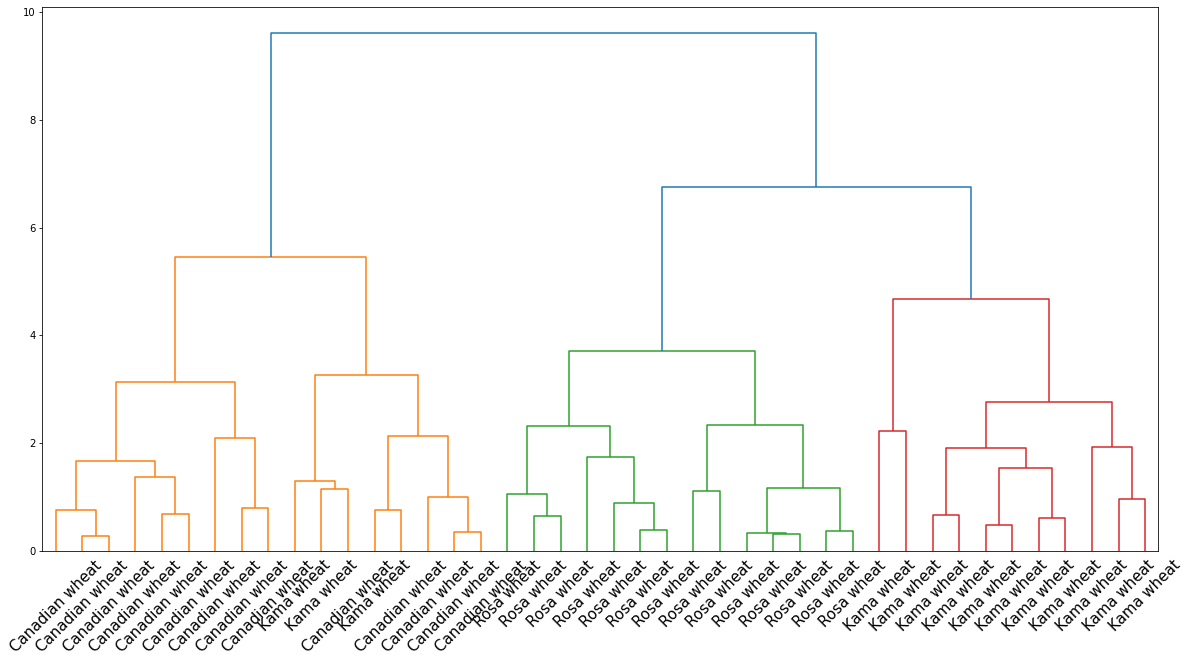

In [ ]:
# build a dendrogram using the dendrogram function in its full form and "with a haircut" up to the third level of clustering

plt.figure(figsize=(20, 10))
dendrogram(mergings, labels=df['grain_variety'].values, leaf_rotation=90, leaf_font_size=15)
plt.xticks(rotation=45)
plt.show()

---

4.	Обучите модель кластеризации `AgglomerativeClustering` с построением кластеров без каких-либо ограничений.

In [ ]:
# train the AgglomerativeClustering clustering model with building clusters without any restrictions

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, compute_distances=True)
labels = model.fit_predict(df2)
print(labels) # quantity of clusters for each seed

[2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 2 0]


---

5.	Убедитесь в идентичности структуры, построив дендрограмму полученных кластеров.

In [ ]:
# confirm the identity of the structure by constructing a dendrogram of the resulting clusters

def plot_dendrogram(model, **kwargs):
    # create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # plot the corresponding dendrogram
    plt.figure(figsize=(20, 10))
    dendrogram(linkage_matrix, **kwargs)
    plt.show()

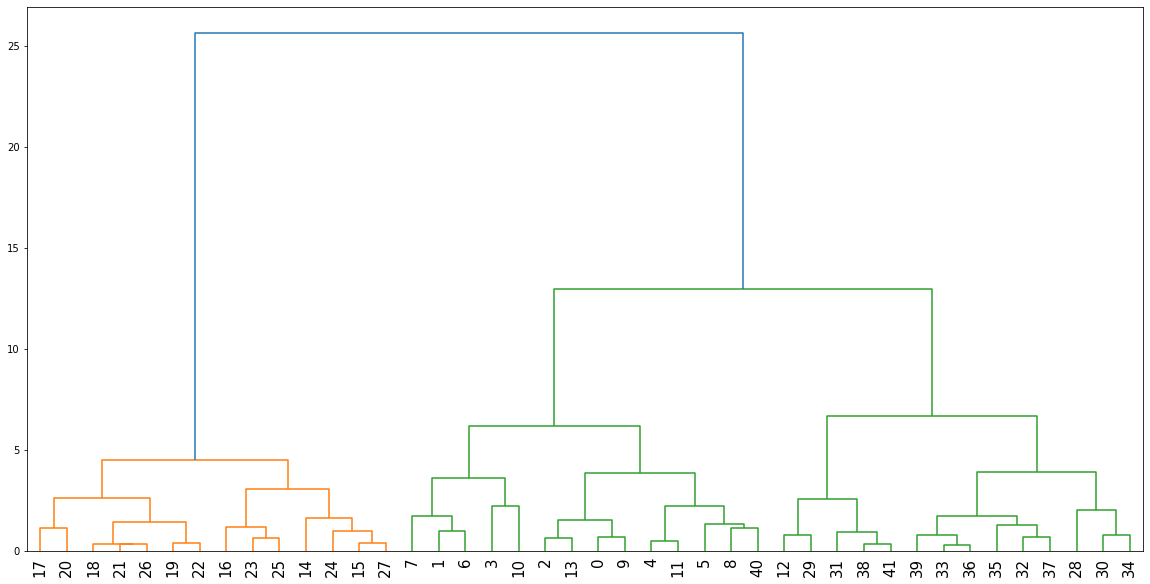

In [ ]:
# use the plot_dendrogram function to visualize the clusters
plot_dendrogram(model, leaf_font_size=15)